Reading notes and partial solutions to [Data Structures and Algorithms in Python](https://blackwells.co.uk/bookshop/product/9781118290279?gC=f177369a3b&gclid=Cj0KCQjwhJrqBRDZARIsALhp1WTBIyoxeQGXedlVy80vsglvFbNkVf7jTP0Z0zXEIP87lfqbtb4_diYaAr8dEALw_wcB).

In [2]:
import random
from matplotlib import pyplot as plt
import math
from datetime import datetime

# Python Primer

## Generators

In [3]:
# Traditional way
def factors(n):
    '''Return the factors of n as a list.'''
    results = []
    for k in range(1, n+1):
        if n % k == 0:
            results.append(k)
    return results

def test():
    assert factors(1) == [1]
    assert factors(4) == [1, 2, 4]
    assert factors(10) == [1, 2, 5, 10]
    return True

test()

True

In [4]:
# Using generator
def factors(n):
    '''Return the factors of n as a list.'''
    for k in range(1, n+1):
        if n % k == 0:
            yield k

def test():
    assert list(factors(1)) == [1]
    assert list(factors(4)) == [1, 2, 4]
    assert list(factors(10)) == [1, 2, 5, 10]
    return True

test()

True

In [5]:
factors(10)

<generator object factors at 0x00000278B636E9E8>

In [6]:
for i in factors(10):
    print(i)

1
2
5
10


In [7]:
def factors(n): # generator that computes factors
    '''Return the factors of n as a list.'''
    k = 1
    while k * k < n: # while k < sqrt(n)
        if n % k == 0:
            yield k # k is a factor of n
            yield n // k # so is n // k
            # this step improves efficiency because we get two factors at one comparison
        k += 1
    if k * k == n: # special case if n is perfect square
        yield k # k is a factor, but the "complementing factor" is also k

def test():
    # the resulting factors are not in increasing order but in complementing pairs instead,
    # so we need to use the unordered set() to test for equality
    assert set(factors(1)) == {1}
    assert set(factors(4)) == {1, 2, 4}
    assert set(factors(10)) == {1, 2, 5, 10}
    return True

test()

True

In [8]:
factors(10)

<generator object factors at 0x00000278B636ECA8>

In [9]:
for i in factors(10):
    print(i)

1
10
2
5


## Exercises

### Reinforcement

In [10]:
'''R-1.1. Write a short Python function, is_multiple(n, m), that takes two integer
values and returns True if n is a multiple of m, that is, n = mi for some
integer i, and False otherwise.'''

def is_multiple(n, m):
    return n % m == 0

def random_exp():
    m = random.randint(-1000000, 1000000)
    n = m * random.randint(-1000000, 1000000)
    return n, m

def random_counter_exp():
    m = random.randint(-1000000, 1000000) 
    while m == 1:
        m = random.randint(-1000000, 1000000) # there exists not counter example if m = 1
    n = m * random.randint(-1000000, 1000000) + m // 2
    return n, m

def test():
    for counter in range(50):
        exp = random_exp()
        assert is_multiple(exp[0], exp[1])
        counterExp = random_counter_exp()
        assert not is_multiple(counterExp[0], counterExp[1])
    return True

test()

True

In [11]:
"""R-1.2. Write a short Python function, is_even(k), that takes an integer value and
returns True if k is even, and False otherwise. However, your function
cannot use the multiplication, modulo, or division operators."""

def is_even(k):
    lastDigit = str(k)[-1]
    return lastDigit in ('0', '2', '4', '6', '8')

def random_exp():
    m = random.randint(-1000000, 1000000)
    return 2 * m

def random_counter_exp():
    m = random.randint(-1000000, 1000000)
    return 2 * m + 1

def test():
    for counter in range(50):
        assert is_even(random_exp())
        assert not is_even(random_counter_exp())
    return True

test()

True

In [12]:
"""R-1.3. Write a short Python function, minmax(data), that takes a sequence of
one or more numbers, and returns the smallest and largest numbers, in the
form of a tuple of length two. Do not use the built-in functions min or
max in implementing your solution."""

def minmax(data):
    if len(data) != 0:
        curMin = data[0]
        curMax = data[0]
        for x in data:
            if x < curMin:
                curMin = x
            elif x > curMax:
                curMax = x
        return curMin, curMax

def random_list():
    n = random.randint(1, 100)
    result = [0] * n
    for i in range(n):
        result[i] = random.randint(-1000000, 1000000)
    return result

def test():
    for counter in range(50):
        data = random_list()
        assert minmax(data) == (min(data), max(data))
    return True

test()

True

In [13]:
"""R-1.4. Write a short Python function that takes a positive integer n and returns
the sum of the squares of all the positive integers smaller than n."""

def sum_squares(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    result = 0
    for i in range(n):
        result += i ** 2
    return result

def test():
    assert sum_squares(4) == 1 + 4 + 9
    assert sum_squares(0) == 0
    try:
        sum_squares(-5)
    except ValueError as e:
        print('Caught error: ' + str(e))
    return True

test()

Caught error: Input must be positive.


True

In [14]:
"""R-1.5. Give a single command that computes the sum from Exercise R-1.4, relying
on Python’s comprehension syntax and the built-in sum function."""

def sum_squares2(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    return sum([i ** 2 for i in range(n)])

def test():
    for counter in range(50):
        num = random.randint(1, 100)
        assert sum_squares(num) == sum_squares2(num)
    return True

test()

True

In [15]:
"""R-1.6. Write a short Python function that takes a positive integer n and returns
the sum of the squares of all the odd positive integers smaller than n."""

def sum_squares_odd(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    result = 0
    for i in range(n):
        if not is_even(i):
            result += i ** 2
    return result

def test():
    assert sum_squares_odd(4) == 1 + 9
    assert sum_squares_odd(0) == 0
    return True

test()

True

In [16]:
"""R-1.7. Give a single command that computes the sum from Exercise R-1.6, relying
on Python’s comprehension syntax and the built-in sum function."""

def sum_squares_odd2(n):
    if n < 0:
        raise ValueError("Input must be positive.")
    return sum([i ** 2 if not is_even(i) else 0 for i in range(n)])

def test():
    for counter in range(50):
        num = random.randint(1, 100)
        assert sum_squares_odd(num) == sum_squares_odd2(num)
    return True

test()

True

In [17]:
"""R-1.8. Python allows negative integers to be used as indices into a sequence,
such as a string. If string s has length n, and expression s[k] is used for index
−n≤k<0, what is the equivalent index j ≥0 such that s[j] references
the same element?"""

def equiv_index(n, k):
    return n + k

def random_char():
    num = random.randint(97, 122)
    return chr(num)

def random_string(n):
    return ''.join([random_char() for i in range(n)])

def test():
    for counter in range(50):
        num = random.randint(0, 100)
        s = random_string(num)
        for i in range(1, num + 1):
            k = -i
            assert s[k] == s[equiv_index(num, k)]
    return True

test()

True

In [18]:
"""R-1.9. What parameters should be sent to the range constructor, to produce a
range with values 50, 60, 70, 80?"""

for i in range(50, 90, 10):
    print(i)

50
60
70
80


In [19]:
"""R-1.10. What parameters should be sent to the range constructor, to produce a
range with values 8, 6, 4, 2, 0, −2, −4, −6, −8?"""

for i in range(8, -10, -2):
    print(i)

8
6
4
2
0
-2
-4
-6
-8


In [20]:
"""R-1.11. Demonstrate how to use Python’s list comprehension syntax to produce
the list [1, 2, 4, 8, 16, 32, 64, 128, 256]."""

print([2 ** i for i in range(1, 9)])

[2, 4, 8, 16, 32, 64, 128, 256]


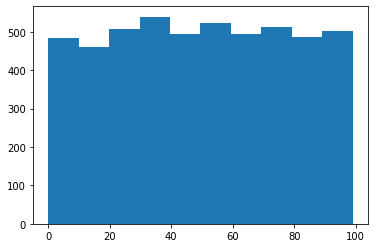

In [21]:
"""R-1.12. Python’s random module includes a function choice(data) that returns a
random element from a non-empty sequence. The random module includes
a more basic function randrange, with parameterization similar to
the built-in range function, that return a random choice from the given
range. Using only the randrange function, implement your own version
of the choice function."""

def choice(data):
    index = random.randrange(0, len(data))
    return data[index]

def test():
    data = [choice([i for i in range(100)]) for j in range(5000)]
    plt.hist(data)

test()

### Creativity

In [22]:
"""C-1.13. Write a pseudo-code description of a function that reverses a list of n
integers, so that the numbers are listed in the opposite order than they
were before, and compare this method to an equivalent Python function
for doing the same thing."""

def rev(seq):
    n = len(seq)
    res = [0] * n
    for i in range(n):
        res[i] = seq[n-i-1]
    return res

def test():
    for counter in range(50):
        seq = random_list()
        assert rev(seq) == list(reversed(seq))
    return True

test()

True

In [23]:
"""C-1.14. Write a short Python function that takes a sequence of integer values and
determines if there is a distinct pair of numbers in the sequence whose
product is odd."""

def odd_product(seq):
    seq = filter(lambda x: not is_even(x), seq) # filter out even numbers
    seq = list(set(seq)) # remove duplicates
    return len(seq) > 1

def test():
    assert odd_product([1, 3, 5, 2])
    assert not odd_product([4, 2, 10, 26])
    return True

test()

True

In [24]:
"""C-1.15. Write a Python function that takes a sequence of numbers and determines
if all the numbers are different from each other (that is, they are distinct)."""

def distinct(seq):
    d = {} # dictionary with key as counter
    for x in seq:
        if x in d:
            return False
        else:
            d[x] = 1
    return True

def test():
    assert distinct([i for i in range(10)])
    assert not distinct([1, 2, 7, 4, 1])
    return True

test()

True

In [25]:
"""C-1.16. In our implementation of the scale function (page 25), the body of the loop
executes the command data[j] = factor. We have discussed that numeric
types are immutable, and that use of the = operator in this context causes
the creation of a new instance (not the mutation of an existing instance).
How is it still possible, then, that our implementation of scale changes the
actual parameter sent by the caller?"""

"""The list, data, is referential and mutable."""

'The list, data, is referential and mutable.'

In [26]:
"""C-1.17. Had we implemented the scale function (page 25) as follows, does it work
properly?

def scale(data, factor):
    for val in data:
        val *= factor

"""

"""No. The list, data, does not change as the alias, val, for each element in the list, is pointed to another value. """

'No. The list, data, does not change as the alias, val, for each element in the list, is pointed to another value. '

In [27]:
"""C-1.18. Demonstrate how to use Python’s list comprehension syntax to produce
the list [0, 2, 6, 12, 20, 30, 42, 56, 72, 90]."""

print([x * (x + 1) for x in range(10)])

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]


In [28]:
"""C-1.19. Demonstrate how to use Python’s list comprehension syntax to produce
the list [ a , b , c , ..., z ], but without having to type all 26 such
characters literally."""

print([chr(i) for i in range(97, 123)])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [29]:
"""C-1.20. Python’s random module includes a function shuffle(data) that accepts a
list of elements and randomly reorders the elements so that each possible
order occurs with equal probability. The random module includes a
more basic function randint(a, b) that returns a uniformly random integer
from a to b (including both endpoints). Using only the randint function,
implement your own version of the shuffle function."""

def shuffle(data):
    n = len(data)
    res = [None] * n # reshuffled list
    taken = [None] * n # list of new indexes taken
    for i in range(n):
        newIndex = random.randint(0, n-1)
        while newIndex in taken: # if the generated index is already taken, pick randomly again
            newIndex = random.randint(0, n-1)
        taken[i] = newIndex
        res[newIndex] = data[i]
    return res

def test():
    for counter in range(50):
        data = random_list()
        assert set(data) == set(shuffle(data))
    return True

test()

True

In [30]:
"""C-1.21. Write a Python program that repeatedly reads lines from standard input
until an EOFError is raised, and then outputs those lines in reverse order
(a user can indicate end of input by typing ctrl-D)."""

def reader():
    lines = [] # stack would be better
    while True:
        try:
            lines.append(input("Enter: "))
        except EOFError:
            break
    n = len(lines)
    for i in range(n):
        print(lines[n-i-1])

# or
# def reader():
#     lines = []
#     try:
#         while True:
#             lines.append(input("Enter: "))
#     except EOFError:
#         n = len(lines)
#         for i in range(n):
#             print(lines[n-i-1])

# reader() # try in command line

In [31]:
"""C-1.23. Give an example of a Python code fragment that attempts to write an element
to a list based on an index that may be out of bounds. If that index
is out of bounds, the program should catch the exception that results, and
print the following error message: Don’t try buffer overflow attacks in Python!"""

data = [1,2,3]
try:
    data[3] = 4
except IndexError:
    print("Don’t try buffer overflow attacks in Python!")

Don’t try buffer overflow attacks in Python!


In [32]:
"""C-1.24. Write a short Python function that counts the number of vowels in a given
character string."""

def count_vowels(s):
    counter = 0
    for char in s:
        if char in ['a', 'e', 'i', 'o', 'u']:
            counter += 1
    return counter

def test():
    assert count_vowels('aerawfsdasdawae') == 7
    assert count_vowels('') == 0
    return True

test()

True

In [33]:
"""C-1.25. Write a short Python function that takes a string s, representing a sentence,
and returns a copy of the string with all punctuation removed. For example,
if given the string "Let's try, Mike.", this function would return
"Lets try Mike"."""

def remove_punctuation(s):
    res = ''
    for char in s:
        if char not in [',', '.', ';', ':', '?', '!', '\'', '"']:
            res += char
    return res

def test():
    assert remove_punctuation("Let's try, Mike") == "Lets try Mike"
    assert remove_punctuation("She said: \"Let's try, Mike\"") == "She said Lets try Mike"
    return True

test()

True

In [34]:
"""C-1.26. Write a short program that takes as input three integers, a, b, and c, from
the console and determines if they can be used in a correct arithmetic
formula (in the given order), like “a+b = c,” “a = b−c,” or “a ∗ b = c.”"""

def formula(a, b, c):
    return (a + b == c) or (a - b == c) or (a * b == c) or (a == b + c) or (a == b - c) or (a == b * c)

def test():
    assert formula(1, 2, 3)
    assert formula(10, 2, 5)
    assert not formula(2, 3, 4)
    return True

test()

True

In [35]:
"""C-1.27. In Section 1.8, we provided three different implementations of a generator
that computes factors of a given integer. The third of those implementations,
from page 41, was the most efficient, but we noted that it did not
yield the factors in increasing order. Modify the generator so that it reports
factors in increasing order, while maintaining its general performance advantages."""

def factors(n):
    '''Return the factors of n in a list in increasing order.'''
    k = 1
    temp = [] # temporarily store the large n // k values that violate the increasing order
    # yield k only when k < n // k, and yield n // k separately at the end
    while k * k < n: # moments where k < n // k
        if n % k == 0:
            yield k
            temp.append(n // k)
        k += 1
    if k * k == n: # moment where k == n // k
        yield k
    for i in reversed(temp): # yield the stored values at the end
        yield i

def test():
    assert list(factors(1)) == [1]
    assert list(factors(4)) == [1, 2, 4]
    assert list(factors(10)) == [1, 2, 5, 10]
    return True

test()

True

In [36]:
'''C-1.28. The p-norm of a vector v = (v1,v2, . . . ,vn) in n-dimensional space is defined
as 
||v|| = \sqrt{v1^p + v2^p + ... + vn^p}
For the special case of p = 2, this results in the traditional Euclidean
norm, which represents the length of the vector. For example, the Euclidean
norm of a two-dimensional vector with coordinates (4,3) has a
Euclidean norm of
\sqrt{4^2 + 3^2} = 5
Give an implementation of a function named norm such that norm(v, p) returns the p-norm
value of v and norm(v) returns the Euclidean norm of v. You may assume
that v is a list of numbers.'''

def norm(v, p = 2):
    return (sum([x ** p for x in v])) ** (1/p)

def test():
    assert norm([4, 3], 2) == 5.
    assert norm([8, 6], 2) == 10.
    return True

test()

True

### Projects

In [37]:
'''P-1.29. Write a Python program that outputs all possible strings formed by using
the characters c , a , t , d , o , and g exactly once.'''

CHARS = 'catdog'

def permute_chars(chars):
    charList = [char for char in chars]
    n = len(charList)
    indexPerms = permute(list(range(n)))
    return [[chars[i] for i in indexPerm] for indexPerm in indexPerms]

def permute(seq):
    '''Return a list of all permutations of seq.'''
    n = len(seq)
    if n == 0:
        return []
    elif n == 1:
        return [seq]
    else:
        permutations = []
        # append each element to the permutations of the remaining elements
        for i in range(n):
            fixed = seq[i] # fix the element at index i
            seq1 = swap(seq, i, 0) # and swap it to the front
            remainingSeqIndex = list(filter(lambda j: j != i, list(range(n)))) # indices of the remaining elements
            remainingSeq = [seq[j] for j in remainingSeqIndex] # the remaining sequence without the element at index i
            remainingSeqPermute = permute(remainingSeq) # recursively generate permutations of the remaining sequence
            for s in remainingSeqPermute: # append the fixed element to these permutations
                s.insert(0, fixed) # not that this operation does not return anything
            seqPermute = remainingSeqPermute
            permutations += seqPermute
        return permutations

def swap(seq, i1, i2):
    '''Return a copy of seq with elements at indices i1 and i2 swapped.'''
    seq1 = [x for x in seq]
    temp = seq1[i1]
    seq1[i1] = seq1[i2]
    seq1[i2] = temp
    return seq1

def factorial(n):
    '''Return n! for any positive integer n.'''
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)

def unique(seq):
    '''Return True of sequence contains no duplicates. Compatible with unhashable types, e.g., list of lists, which
    cannot be passed to set() to remove duplicates.'''
    return len(list(set(tuple(x) for x in seq))) == len(seq)

def test():
    perms = permute_chars(CHARS)
    # check that the number of permutations is n! and that the permutations are unique
    assert len(perms) == factorial(len(CHARS)) and unique(perms)
    for counter in range(50):
        num = random.randint(1, 5)
        string = random_string(num)
        while not unique(string):
            string = random_string(num)
        perms = permute_chars(string)
        assert len(perms) == factorial(num) and unique(perms)
    return True

test()

True

In [38]:
"""P-1.30. Write a Python program that can take a positive integer greater than 2 as
input and write out the number of times one must repeatedly divide this
number by 2 before getting a value less than 2."""

def halving_times(n):
    if type(n) is not int:
        raise ValueError("Input must be integer.")
    if n < 2:
        return 0
    elif n == 2:
        return 1
    else:
        return 1 + halving_times(n//2)

def test():
    assert halving_times(4) == 2
    assert halving_times(9) == 3
    for counter in range(50):
        num = random.randint(0, 100)
        for i in range(halving_times(num)):
            num = num // 2
        assert num < 2
    return True

test()

True

In [39]:
"""P-1.31. Write a Python program that can "make change." Your program should
take two numbers as input, one that is a monetary amount charged and the
other that is a monetary amount given. It should then return the number
of each kind of bill and coin to give back as change for the difference
between the amount given and the amount charged. The values assigned
to the bills and coins can be based on the monetary system of any current
or former government. Try to design your program so that it returns as
few bills and coins as possible."""

BILLS = [1, 2, 5, 10, 20, 50, 100]

def helper(charged, given, changes):
    '''Return the bills included in the changes as a bill:number dictionary recursively.'''
    if given < charged:
        raise ValueError("Insufficient amount given.")
    diff = given - charged
    for bill in reversed(BILLS):
        if bill <= diff:
            changes[bill] += 1
            if bill < diff:
                return helper(charged, given - bill, changes) # recursively find changes
            else:
                return changes
        else:
            continue
    return changes

def make_change(charged, given):
    initialDict = {bill:0 for bill in BILLS} # initialize dictionary
    changes = helper(charged, given, initialDict)
    return changes

def test():
    for counter in range(50):
        charged = random.randint(0, 100)
        given = random.randint(0, 500)
        while given < charged:
            given = random.randint(0, 500) # given must be no less than charged
        charges = make_change(charged, given)
        paid = 0
        for k, v in charges.items():
            paid += k * v
        assert paid == given - charged
    return True

test()

True

In [40]:
"""P-1.32. Write a Python program that can simulate a simple calculator, using the
console as the exclusive input and output device. That is, each input to the
calculator, be it a number, like 12.34 or 1034, or an operator, like + or =,
can be done on a separate line. After each such input, you should output
to the Python console what would be displayed on your calculator."""

def simple_calculator(): # does not handle parentheses
    num1 = to_numeric(input())
    op = input()
    num2 = to_numeric(input())
    if op == '+':
        print('= ' + str(num1 + num2))
    elif op == '-':
        print('= ' + str(num1 - num2))
    elif op == '*':
        print('= ' + str(num1 * num2))
    else:
        print('= ' + str(num1 / num2))

def to_numeric(num):
    if '.' in num:
        return float(num)
    else:
        return int(num)

simple_calculator()

100
/
3
= 33.333333333333336


In [41]:
"""P-1.33. Write a Python program that simulates a handheld calculator. Your program
should process input from the Python console representing buttons
that are "pushed,"" and then output the contents of the screen after each operation
is performed. Minimally, your calculator should be able to process
the basic arithmetic operations and a reset/clear operation."""

# Without using other modules?

'P-1.33. Write a Python program that simulates a handheld calculator. Your program\nshould process input from the Python console representing buttons\nthat are "pushed,"" and then output the contents of the screen after each operation\nis performed. Minimally, your calculator should be able to process\nthe basic arithmetic operations and a reset/clear operation.'

In [42]:
"""P-1.34. A common punishment for school children is to write out a sentence multiple
times. Write a Python stand-alone program that will write out the
following sentence one hundred times: "I will never spam my friends
again." Your program should number each of the sentences and it should
make eight different random-looking typos."""

SENTENCE = 'I will never spam my friends again.'

def writer():
    n = len(SENTENCE)
    randomSentNums = random.sample(range(0, 100), 8) # indices of sentences to contain typo
    print(randomSentNums)
    randomIndices = [] # indices of characters to be typos in 8 of the sentences
    for i in range(100):
        if i in randomSentNums:
            sentence = SENTENCE
            sentenceList = [char for char in SENTENCE]
            index = random.randint(0, n-1)
            while index in randomIndices:
                index = random.randint(0, n-1) # typos should be different
            typo = random_char()
            while typo == sentence[index]: # typo should differ from original character in the sentence
                typo = random_char()
            sentenceList[index] = typo
            print(str(i+1) + '. ' + ''.join(sentenceList))
        else:
            print(str(i+1) + '. ' + SENTENCE)
            

writer()

[80, 60, 95, 14, 7, 71, 38, 57]
1. I will never spam my friends again.
2. I will never spam my friends again.
3. I will never spam my friends again.
4. I will never spam my friends again.
5. I will never spam my friends again.
6. I will never spam my friends again.
7. I will never spam my friends again.
8. I will never spam my friends agadn.
9. I will never spam my friends again.
10. I will never spam my friends again.
11. I will never spam my friends again.
12. I will never spam my friends again.
13. I will never spam my friends again.
14. I will never spam my friends again.
15. I wcll never spam my friends again.
16. I will never spam my friends again.
17. I will never spam my friends again.
18. I will never spam my friends again.
19. I will never spam my friends again.
20. I will never spam my friends again.
21. I will never spam my friends again.
22. I will never spam my friends again.
23. I will never spam my friends again.
24. I will never spam my friends again.
25. I will never 

In [58]:
"""P-1.35 The birthday paradox says that the probability that two people in a room
will have the same birthday is more than half, provided n, the number of
people in the room, is more than 23. This property is not really a paradox,
but many people find it surprising. Design a Python program that can test
this paradox by a series of experiments on randomly generated birthdays,
which test this paradox for n = 5,10,15,20, . . . ,100."""

def random_bDay():
    '''Return a Birthday object with randomly generated month and day. Does not account for leap year.'''
    month = random.randint(1, 12)
    if month in (1, 3, 5, 7, 8, 10, 12):
        day = random.randint(1, 31)
    else:
        day = random.randint(1, 30)
    return month, day

def tester():
    '''Simulate the probability that two people among n have the same birthday for n = 5, 10, ..., 100.'''
    probs = {n:0 for n in range(5, 105, 5)}
    for n in range(5, 105, 5):
        counter = 0 # number of times no two people have the same birthday in 100 experiments
        for experiment in range(100): # run experiments 100 times
            bDays = []
            sameBdayNum = 0 # number of people with the same birthday
            for i in range(n):
                bDay = random_bDay()
                if bDay in bDays:
                    sameBdayNum += 1
                bDays.append(bDay)
            if sameBdayNum == 0: # if no two people have the same birthday
                counter += 1
        probs[n] = 1 - counter/100 # probability that at least two people have the same birthday
    return probs
        
tester()

{5: 0.040000000000000036,
 10: 0.12,
 15: 0.28,
 20: 0.49,
 25: 0.5900000000000001,
 30: 0.73,
 35: 0.88,
 40: 0.83,
 45: 0.9299999999999999,
 50: 0.97,
 55: 0.99,
 60: 0.99,
 65: 1.0,
 70: 1.0,
 75: 1.0,
 80: 1.0,
 85: 1.0,
 90: 1.0,
 95: 1.0,
 100: 1.0}

In [59]:
"""P-1.36. Write a Python program that inputs a list of words, separated by whitespace,
and outputs how many times each word appears in the list. You
need not worry about efficiency at this point, however, as this topic is
something that will be addressed later in this book."""

def word_count(words):
    counter = {word:0 for word in set(words)}
    for word in words:
        counter[word] += 1
    return counter

def test():
    words = ['I', 'see', 'you', 'I', 'hear', 'you']
    counter = word_count(words)
    assert counter['I'] == 2
    return True

test()

True

# OOP

## Multidimensional vector

In [6]:
class Vector:
    """Represent a vector in a multidimensional space."""
    
    def __init__(self, d):
        """Create a d-dimensional vector of zeros."""
        self._container = [0] * d
    
    def __len__(self):
        """Return the length of vector."""
        return len(self._container)
    
    def __getitem__(self, i):
        """Return the i-th coordinate of vector."""
        if i >= 0 or i < len(self):
            raise ValueError("Index out of range.")
        return self._container[i]
    
    def __setitem__(self, i, value):
        """Set the i-th coordinate of vector to given value."""
        if i >= 0 or i < len(self):
            raise ValueError("Index out of range.")
        self._container[i] = value
    
    def __add__(self, other):
        """Return the sum of two vectors."""
        if len(self) != len(other):
            raise ValueError("Addition not allowed on vectors with different lengths.")
        d = len(self)
        new = Vector(d)
        for i in range(d):
            new[i] = self[i] + other[i]
        return new
    
    def __eq__(self, other):
        """Return True if the two vectors are the same entry-wise."""
        return self._container == other._container
    
    def __ne__(self, other):
        """Return True if the two vectors differ in some coordinate."""
        return not self == other # rely on existing __eq__()
    
    def str (self):
        """Produce string representation of vector."""
        return '<' + str(self. coords)[1:-1] + '>'

In [7]:
help(Vector)

Help on class Vector in module __main__:

class Vector(builtins.object)
 |  Represent a vector in a multidimensional space.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Return the sum of two vectors.
 |  
 |  __eq__(self, other)
 |      Return True if the two vectors are the same entry-wise.
 |  
 |  __getitem__(self, i)
 |      Return the i-th coordinate of vector.
 |  
 |  __init__(self, d)
 |      Create a d-dimensional vector of zeros.
 |  
 |  __len__(self)
 |      Return the length of vector.
 |  
 |  __ne__(self, other)
 |      Return True if the two vectors differ in some coordinate.
 |  
 |  __setitem__(self, i, value)
 |      Set the i-th coordinate of vector to given value.
 |  
 |  str(self)
 |      Produce string representation of vector.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |   

## Iterator

In [5]:
class SequenceIterator:
    """An iterator for any of Python's sequence types"""
    
    def init (self, sequence):
        """Create an iterator for the given sequence."""
        self._seq = sequence # keep a reference to the underlying data
        self._k = -1 # will increment to 0 on first call to next
    
    def __next__(self):
        """Return the next element if it exists and raise StopIteration otherwise."""
        self._k += 1 # advance to the next index
        if self._k < len(sequence): # if there are remaining elements, return the next one
            return self._seq[self._k]
        else: # if not, raise error
            raise StopIteration()
    
    def __iter__(self):
        """Return the iterator itself."""
        return self

## Exercises